<a href="https://colab.research.google.com/github/cam2149/MachinelearningI/blob/main/Examen1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial Aplicada

## Aprendizaje Automatico 1

## Examen 1

### Integrantes

- Yesid Castelblanco
- Andres Felipe Borrero
- Carlos Alberto Martinez Ramirez
- Nicolas Colmenares

### **Profesores**

- Santiago Ortiz
- Henry Velasco

Fecha: _ de 2024

# Ejercicio 1

## Datos

Considere el conjunto de datos “data1” del fichero data_exam1.xls

### Puntos

1. Realice un análisis exploratorio de datos ¿Considera que podría generar un modelo de regresión lineal con variable categórica (sin interacción) para la variable Y? Justifique. Si la
respuesta a la pregunta es SI, genere un modelo de regresión sin interacción e interpretelo.

2. Realice un gráfico de dispersión para Y vs X, considerando para cada observación su respectivo valor en la variable Ind. ¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a incrementos unitarios de X? ¿Considera que un modelo con
interacciones sería más adecuado? Si la respuesta a estas preguntas es afirmativa, genere el
respectivo modelo, interprete detalladamente los resultados y valide los supuestos del modelo propuesto

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(style="ticks", color_codes=True)
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 150

In [2]:
url = 'https://github.com/cam2149/MachinelearningI/raw/85795f6469ebde1f693b7cb6c893c10135408974/data_exam1.xlsx'

df=pd.read_excel(url, sheet_name='data1')

##Ejercicio 1_1

In [3]:
# @title Análisis explotatorio de datos
df

,Y,X,Ind
0,66.199147,12.653765,0
1,44.311301,8.204418,0
2,48.390783,8.768596,0
3,58.087413,16.169568,1
4,60.708671,9.980310,0
...,...,...,...
995,54.191565,6.769546,0
996,37.481140,9.297337,1
997,26.864547,9.391452,0
998,100.950444,17.370262,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   float64
 1   X       1000 non-null   float64
 2   Ind     1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [5]:
df.describe()

,Y,X,Ind
count,1000.000000,1000.000000,1000.0000
mean,46.953751,9.976858,0.2000
std,22.046143,3.762567,0.4002
min,-34.894319,-4.263757,0.0000
25%,32.427643,7.638899,0.0000
50%,45.460252,9.952888,0.0000
75%,61.587567,12.379984,0.0000
max,135.542574,25.628678,1.0000


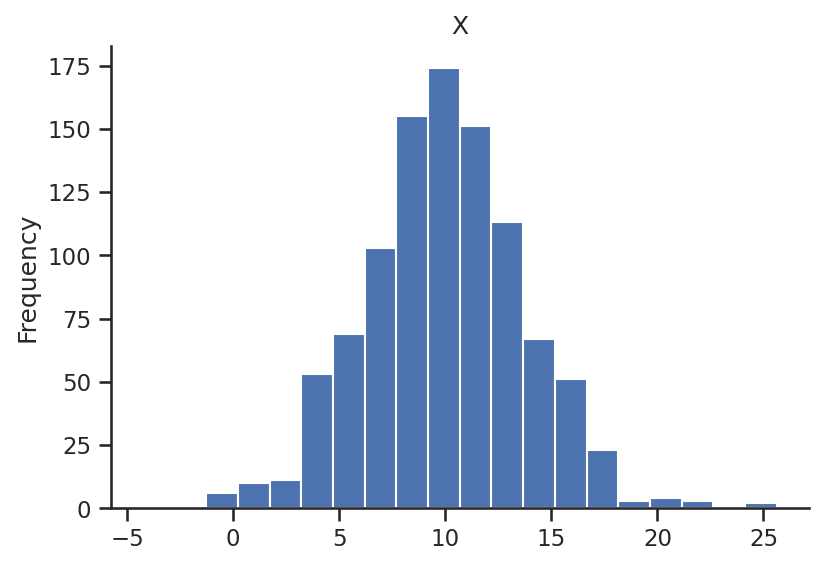

In [6]:
# @title X

from matplotlib import pyplot as plt
df['X'].plot(kind='hist', bins=20, title='X')
plt.gca().spines[['top', 'right',]].set_visible(False)

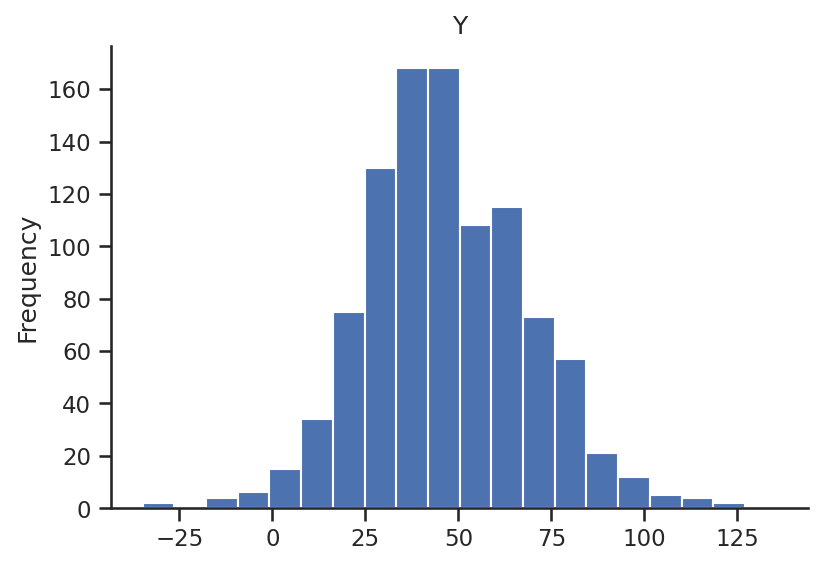

In [7]:
# @title Y

from matplotlib import pyplot as plt
df['Y'].plot(kind='hist', bins=20, title='Y')
plt.gca().spines[['top', 'right',]].set_visible(False)

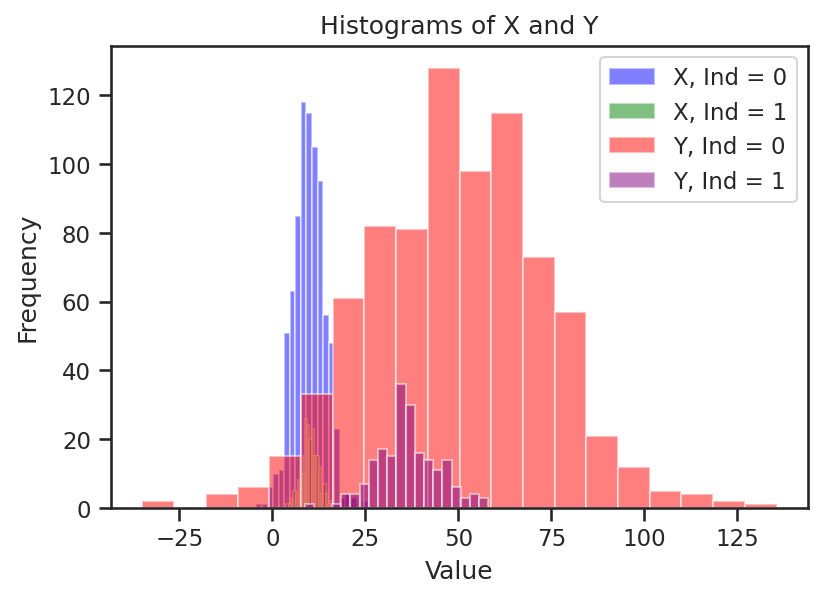

In [8]:
# @title Histograms of X and Y

import matplotlib.pyplot as plt


plt.hist(df[df['Ind'] == 0]['X'], bins=20, alpha=0.5, label='X, Ind = 0', color='blue')
plt.hist(df[df['Ind'] == 1]['X'], bins=20, alpha=0.5, label='X, Ind = 1', color='green')
plt.hist(df[df['Ind'] == 0]['Y'], bins=20, alpha=0.5, label='Y, Ind = 0', color='red')
plt.hist(df[df['Ind'] == 1]['Y'], bins=20, alpha=0.5, label='Y, Ind = 1', color='purple')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of X and Y')
_ = plt.legend()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


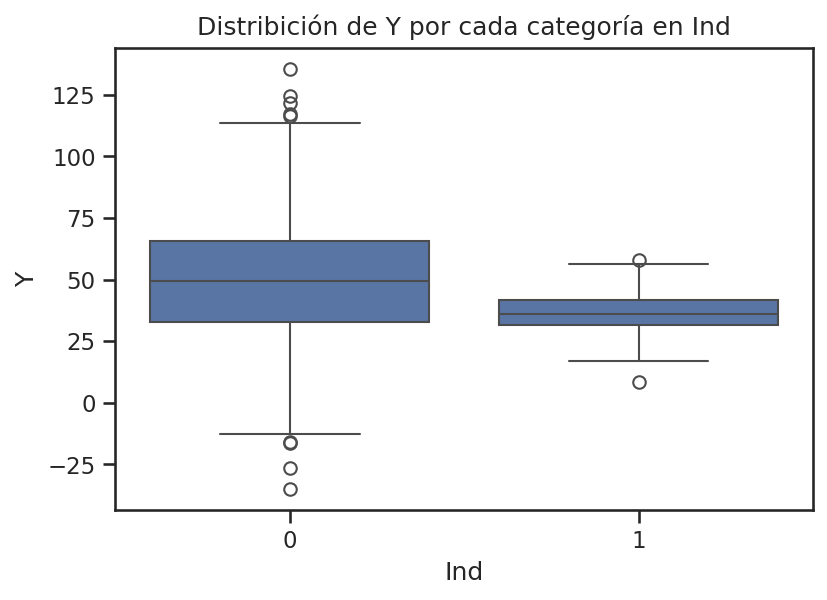

In [9]:
# @title Distribución de 'Y' por cada categoría de Ind
sns.boxplot(x='Ind', y='Y', data=df)
plt.title('Distribición de Y por cada categoría en Ind')
plt.show()

El diagrama de caja indica que la distribución de Y podría ser diferente para cada categoría de Ind.

In [10]:
# @title Matriz de correlación
correlation_matrix = df.corr()
print(correlation_matrix)


            Y         X       Ind
Y    1.000000  0.832057 -0.237224
X    0.832057  1.000000  0.024069
Ind -0.237224  0.024069  1.000000


Text(0, 0.5, 'Y')

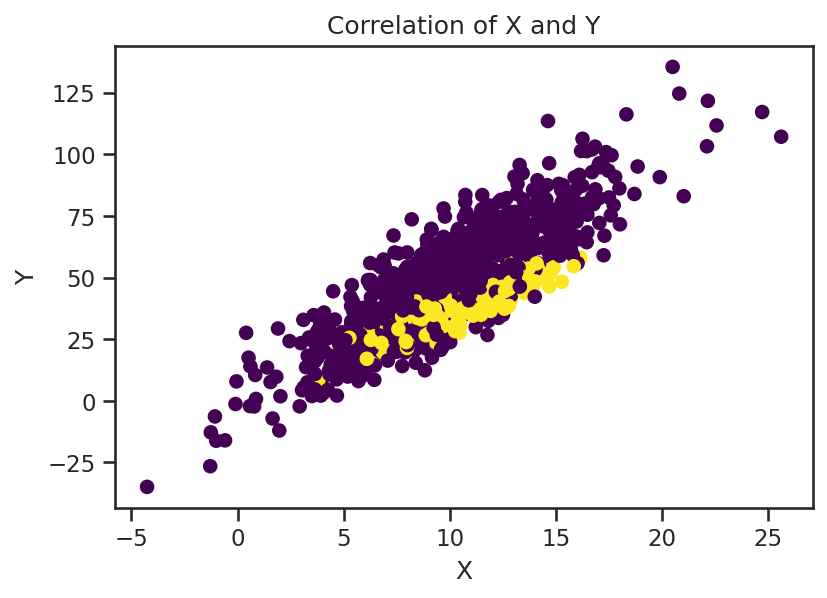

In [11]:
# @title Correlación entre 'X' y 'Y'

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(df['X'], df['Y'], c=df['Ind'], cmap='viridis')
plt.title('Correlation of X and Y')
plt.xlabel('X')
plt.ylabel('Y')



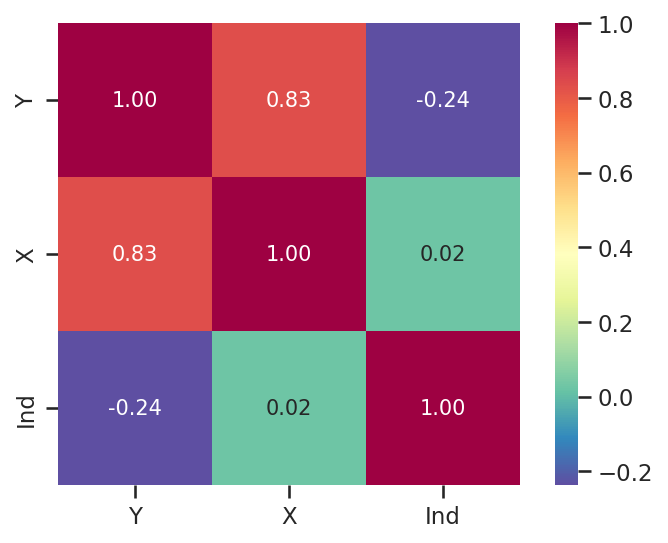

In [12]:
# Correlacion entre variables
numeric_df = df.select_dtypes(include=['number'])
corrmat = numeric_df.corr()

hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=numeric_df.columns,
                 xticklabels=numeric_df.columns,
                 cmap="Spectral_r")
plt.show()

La matriz de correlación muestra la correlación entre X e Y y las correlaciones entre las variables y la variable dependiente Y.

In [13]:
# @title Estadistica Descriptiva del Dataframe
df.describe()

,Y,X,Ind
count,1000.000000,1000.000000,1000.0000
mean,46.953751,9.976858,0.2000
std,22.046143,3.762567,0.4002
min,-34.894319,-4.263757,0.0000
25%,32.427643,7.638899,0.0000
50%,45.460252,9.952888,0.0000
75%,61.587567,12.379984,0.0000
max,135.542574,25.628678,1.0000


### En respuesta a la pregunta **¿Considera que podría generar un modelo de regresión lineal con variable categórica (sin interacción) para la variable Y?**
* **Sí**, Basado en el análisis exploratorio de datos, el diagrama de dispersión muestra una posible dependiencia entre X e Y, se identifica una dependencia de tipo relacion directa (directamente proporcional).
* Se evidencia cierta correlación entre X e Y y sin interacción de la variable categorica Ind, lo que parece posible construir un modelo de regresión.

In [14]:
# @title Modelo de regresión sin interacción e interpretelo
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Preparing the data
X = df[['X']]
y = df[['Y']]
# Dividir el conjunto de datos en conjuntos de entrenamiento y de prueba
train_size = int(len(df) * 0.8)  # Calcular el índice para seleccionar el 80% de los datos.
X_train = df[['X']][:train_size]
Y_train = df[['Y']][:train_size]
x_test = df[['X']][train_size:]
y_test = df[['Y']][train_size:]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)

print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (800, 1)
Y_train shape: (800, 1)
x_test shape: (200, 1)
y_test shape: (200, 1)


In [15]:
#Entrenamiento del Modelo de regresión lineal
from sklearn.linear_model import LinearRegression
regressorModel = LinearRegression()

# Ajuste los datos de entrenamiento a nuestro modelo.
regressorModel_interaction = regressorModel.fit(X_train, Y_train)

**Evaliación del modelo**

In [16]:
#Comprobar la puntuación de predicción
regressorModel.score(x_test, y_test)

0.6976206152814786

In [17]:
# Predicción de los valores de y
y_pred=regressorModel.predict(x_test)
# Creación de un dataframe con valores reales y previstos de y
evaluateModel = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluateModel

,Actual,Predicted
0,5.451543,13.894908
1,79.103886,77.278821
2,17.518589,1.336418
3,34.700521,40.941575
4,51.630719,44.360636
...,...,...
195,54.191565,31.543290
196,37.481140,43.760721
197,26.864547,44.215600
198,100.950444,82.779137


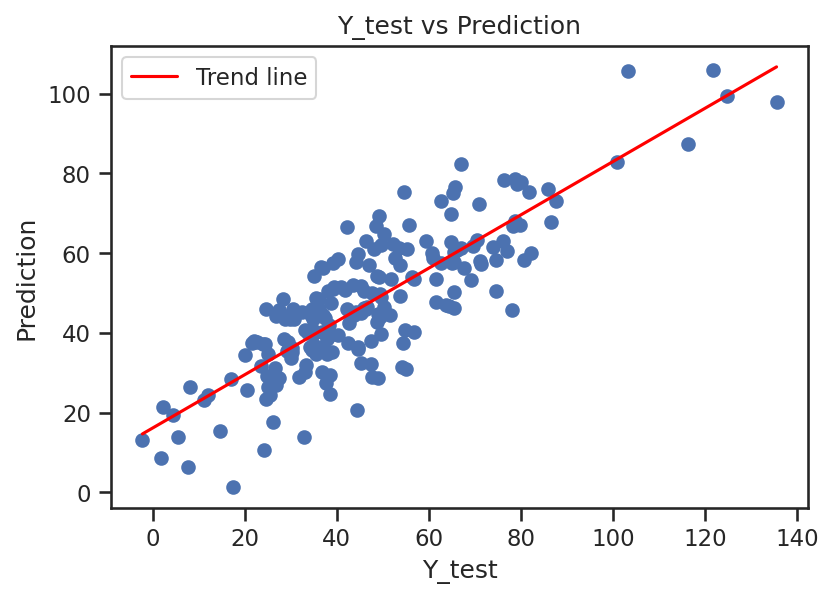

In [18]:
import scipy.stats as stats # Import the stats module from scipy
prediction = regressorModel.predict(x_test)
# Calcular la recta de regresión lineal.
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test.values.flatten(), prediction.flatten())

# Crea la línea de mejor ajuste
x_trend = np.linspace(min(y_test.values.flatten()), max(y_test.values.flatten()), 100)
y_trend = slope * x_trend + intercept

plt.plot(x_trend, y_trend, color='red', label='Trend line')
plt.xlabel('Y_test')
plt.ylabel('Prediction')
plt.title('Y_test vs Prediction')
plt.scatter(y_test, prediction)
plt.legend()
plt.show()

In [19]:
# Puntuación del modelo
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
# R2 Score
r2score = r2_score(y_test, y_pred)
print(f"R2 score: {r2score}")
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE score: {mae}")
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE score: {rmse}")
mse = mean_squared_error(y_test, y_pred)
# Mean Squared Error (MSE)
print(f"MSE score: {mse}")

columnas = ['MAE', 'MSE', 'RMSE', 'R2']
resultados = pd.DataFrame()
resultados = pd.DataFrame({' ': columnas, 'Resultados': [mae, mse, rmse, r2score]});resultados


R2 score: 0.6976206152814786
MAE score: 10.03185390463401
RMSE score: 12.285985796273188
MSE score: 150.94544698622653


,,Resultados
0,MAE,10.031854
1,MSE,150.945447
2,RMSE,12.285986
3,R2,0.697621


In [20]:
import statsmodels.api as sm
# Agregar una constante al modelo para incluir la intersección
x_test_with_constant = sm.add_constant(x_test)
# Ajustar el modelo de regresión lineal
model = sm.OLS(y_test, x_test_with_constant).fit()
# Imprimir el resumen del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     460.7
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           1.42e-53
Time:                        21:55:03   Log-Likelihood:                -784.89
No. Observations:                 200   AIC:                             1574.
Df Residuals:                     198   BIC:                             1580.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3878      0.871     53.229      0.0

##Ejercicio 1_2

###Realice un gráfico de dispersión para Y vs X, considerando para cada observación su respectivo valor en la variable Ind.

*  ¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a
incrementos unitarios de X?
*  ¿Considera que un modelo con interacciones sería más adecuado?

 Si la respuesta a estas preguntas es afirmativa, genere el respectivo modelo, interprete detalladamente los resultados y valide los supuestos del modelo propuesto

<Figure size 1500x1200 with 0 Axes>

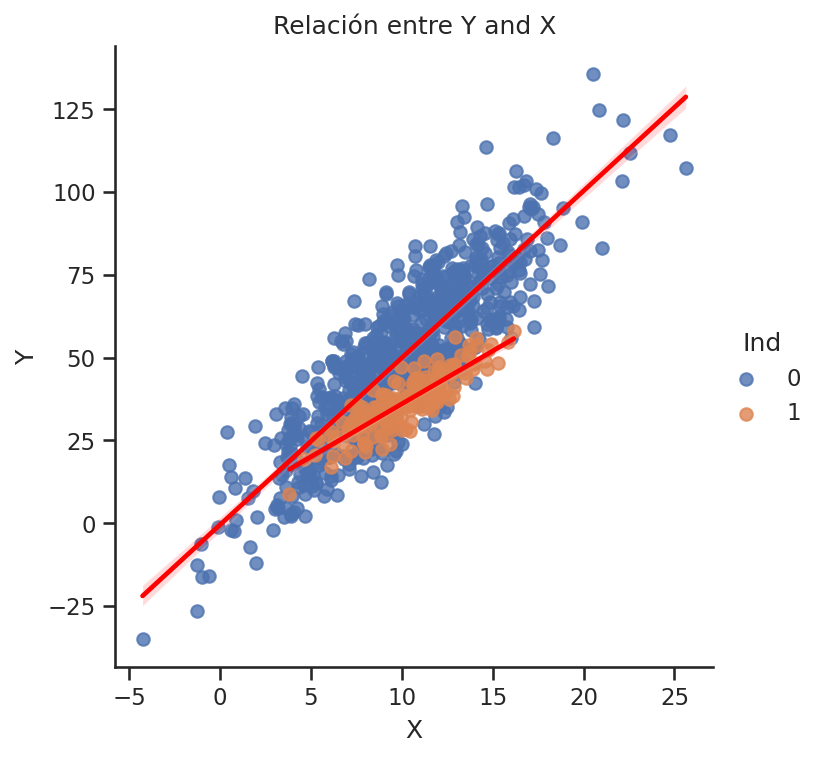

In [21]:
# @title Dispersión Y vs X
from matplotlib import pyplot as plt
# Analyze the relationship between Y and X
plt.figure(figsize=(10, 8))
sns.lmplot(x='X', y='Y', hue='Ind', data=df, line_kws={'color': 'red'})
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Relación entre Y and X')
plt.show()



**¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a incrementos unitarios de X?**

En repuesta a la pregunta anterior podemos decir que **si** hay evidencia muestral que sugiera un cambio de tasa de media de cambio de Y condicionado a incrementos unitarios de X:

*   El gráfico de dispersión Y vs X, con colores diferentes para cada valor la variable categórica 'Ind', nos permite visualizar la relación entre estas variables para cada población muestral definido por la categórica 'Ind', es notable al ver dos patrones de dispersión dependientes de la variable Ind y ***con pendientes diferentes***
* En lo que corresponde al cambio en la tasa media para un mismo incremento unitario de X, el incremento en Y no es el mismo para el patron de dispersión dependientes de la variable 'Ind' igual 0 que para el patron de dispersión dependientes de la variable 'Ind' = 1, es decir que el efecto de X sobre Y depende del valor de 'Ind'

**¿Considera que un modelo con interacciones sería más adecuado?**

* ***Sí***, considerando la evidencia muestral observada en el gráfico de dispersión, un modelo con interacciones entre X e Ind sería más acertado para modelar la variable Y
* Un modelo de regresión lineal sin interacción de la categorica 'Ind' se interpreta que el impacto de X sobre Y es constante e independiente de la variable 'Ind' lo que no es evidenciado en el gráfico de dispersión. Por otro lado un modelo con interacción evidendiaria el impacto de la variable X sobre Y segun la interacción con la categorica 'Ind'.

* Lo anterior indica que la variable 'Ind' influye en la relación entre Y y X, lo que nos permitiria generar un modelo para predecir Y utilizando X e Ind.






'Y ~ X + C(Ind) + X:C(Ind)'
Esta fórmula define un modelo de regresión lineal donde:
* Y es la variable dependiente (la que queremos predecir).
* X es una variable independiente numérica (explicativa).
* C(Ind) representa una variable independiente categórica llamada 'Ind', y su interacción.



In [22]:
# @title Modelo de regresión lineal con interacción entre X e Ind
# Modelo de regresión lineal con interacción entre X e Ind
import scipy.stats as stats # Import the stats module from scipy
# Import statsmodels.formula.api to access the ols function
import statsmodels.formula.api as smf
model_interaction = smf.ols('Y ~ X + C(Ind) + X:C(Ind)', data=df).fit()
print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1081.
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          1.34e-312
Time:                        21:55:07   Log-Likelihood:                -3787.5
No. Observations:                1000   AIC:                             7583.
Df Residuals:                     996   BIC:                             7603.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.4991      1.001     -0.498

In [23]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Con 'Ind' como variable categórica y 'Y' es la variable target
X = df.drop('Y', axis=1)
y = df['Y']

# Dividir el conjunto de datos en conjuntos de entrenamiento y de prueba
train_size = int(len(df) * 0.8)  # Calcular el índice para seleccionar el 80% de los datos para entrenamiento.
X_train = df[['X']][:train_size]
Y_train = df[['Y']][:train_size]
x_test = df[['X']][train_size:]
y_test = df[['Y']][train_size:]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)

print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
# Dividir los datos en entrenamiento y prueba
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train shape: (800, 1)
Y_train shape: (800, 1)
x_test shape: (200, 1)
y_test shape: (200, 1)


In [24]:
# @title Puntuación del modelo
print(f"======================================================================")
print(f"========= Evaluación el modelo sin interaciones con [Ind] ============")
print(f"======================================================================")

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
# Crear un transformador para codificar la variable categórica
categorical_features = ['Ind']
transformer = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough'
)

# Crear un pipeline que incluya el transformador y el modelo de regresión lineal
pipeline = Pipeline([
    ('transformer', transformer),
    ('regression', LinearRegression())
])

# Entrenar el modelo
pipeline.fit(X_train, Y_train)

# Realizar predicciones
y_pred = pipeline.predict(x_test)

# Puntuación del modelo
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# R2 Score
r2score = r2_score(y_test, y_pred)
print(f"R2 score: {r2score}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE score: {mae}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE score: {rmse}")
mse = mean_squared_error(y_test, y_pred)
# Mean Squared Error (MSE)
print(f"MSE score: {mse}")

print(f"======================================================================")
print(f"========= Evaluación el modelo con interaciones con [Ind] ============")
print(f"======================================================================")


# Para incluir interacciones, puedes usar PolynomialFeatures de scikit-learn
from sklearn.preprocessing import PolynomialFeatures

# Crear un pipeline que incluya el transformador, las interacciones y el modelo de regresión lineal
pipeline_with_interactions = Pipeline([
    ('transformer', transformer),
    ('interactions', PolynomialFeatures(interaction_only=True)),
    ('regression', LinearRegression())
])

# Entrenar el modelo con interacciones
pipeline_with_interactions.fit(X_train, Y_train)

# Realizar predicciones con interacciones
y_pred_with_interactions = pipeline_with_interactions.predict(x_test)

# Evaluar el modelo con interacciones
mse = mean_squared_error(y_test, y_pred_with_interactions)
print(f'Mean Squared Error con interacciones: {mse}')

# R2 Score
r2score = r2_score(y_test, y_pred_with_interactions)
print(f"R2 score con interacciones: {r2score}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_with_interactions)
print(f"MAE Absolute error con interacciones: {mae}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_with_interactions))
print(f"RMSE Mean Squared Error: {rmse}")

mse = mean_squared_error(y_test, y_pred_with_interactions)
# Mean Squared Error (MSE)
print(f"MSE Mean Squared Error: {mse}")

========= Evaluación el modelo sin interaciones con [Ind] ============
Mean Squared Error: 129.50949127196836
R2 score: 0.7237370033244928
MAE score: 9.19434730897589
RMSE score: 11.380223691648963
MSE score: 129.50949127196836
========= Evaluación el modelo con interaciones con [Ind] ============
Mean Squared Error con interacciones: 126.31605683387939
R2 score con interacciones: 0.7305490736900582
MAE Absolute error con interacciones: 8.938197133977631
RMSE Mean Squared Error: 11.23904163324789
MSE Mean Squared Error: 126.31605683387939


# Conclusiones

1. El modelo explica una parte de la variabilidad en la variable dependiente Y.
2. La variable X tiene un efecto significativo sobre Y, siendo la pendiente positiva, evidenciado en los graficos de dispersión.
3. La variable Ind, como variable categórica, también impacta en Y, aunque el efecto puede variar según la categoría de Ind como se evidencia en el grafico Distribución de 'Y' por cada categoría de Ind.
4.  La intersección del modelo representa el valor esperado de Y cuando tanto X como Ind son cero.

# Ejercicio 2

## Datos

**data2** del fichero **data_exam.xlsx**

## Puntos

- De acuerdo al analisis del item anterior proponer una transformación para alguna variable y justificar
- Proponer un modelo lineal, iterpretar y validar supuestos

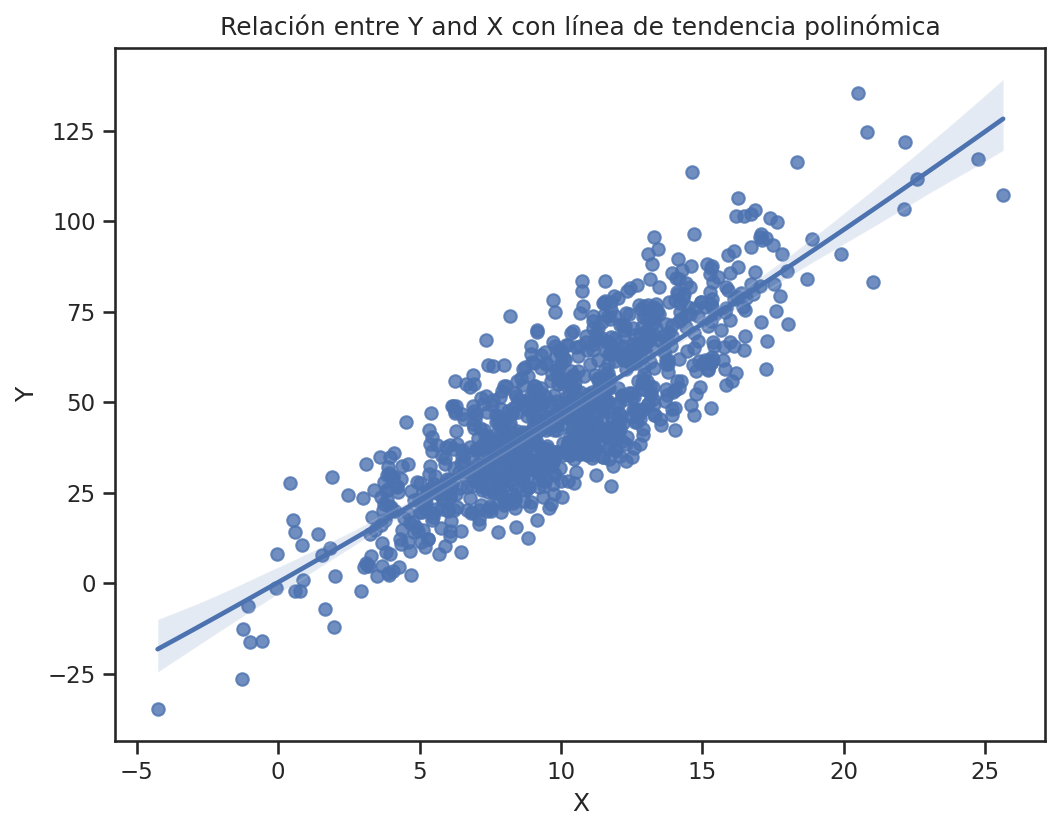

In [25]:
# Agregar una línea de tendencia polinómica de grado 2 para visualizar la curvatura
plt.figure(figsize=(8, 6))
sns.regplot(x='X', y='Y', data=df, order=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Relación entre Y and X con línea de tendencia polinómica')
plt.show()


 Basado en el análisis exploratorio y la observación de la dispersión de los datos, se podría considerar una transformación logarítmica para la variable X.

* Se proponen dos transformaciones para X debido a la curvatura o no linealidad observada en la relación entre X e Y, visible en el gráfico de dispersión anterior sin interación de 'Ind':
 * Logarítmica
 * Raiz


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


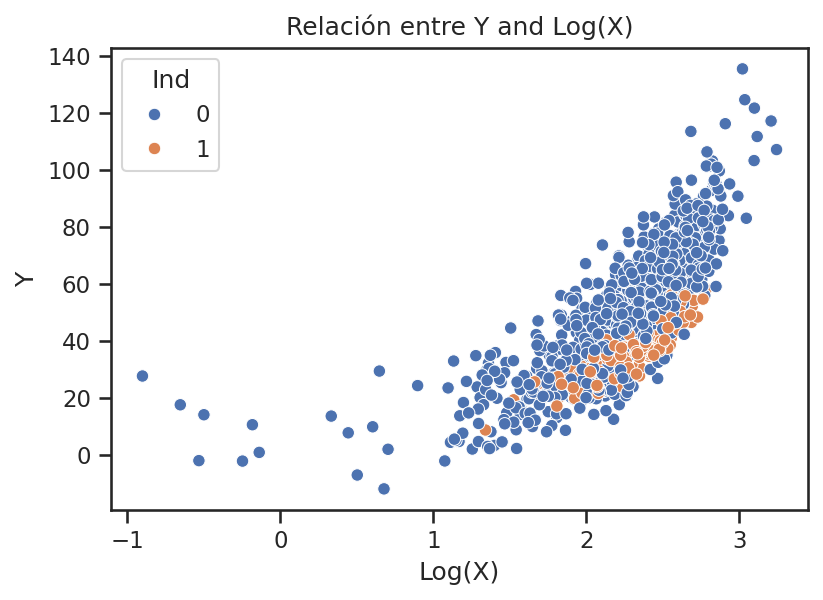

"\nfrom matplotlib import pyplot as plt\n# Analyze the relationship between Y and X\nplt.figure(figsize=(10, 8))\n# sns.scatterplot(x='X', y='Y', hue='Ind', data=df)\nsns.lmplot(x='X_log', y='Y', hue='Ind', data=df, line_kws={'color': 'red'})\nplt.xlabel('X_log')\nplt.ylabel('Y')\nplt.title('Relación entre Y and X_log')\nplt.show()\n"

In [26]:
# @title Se Aplica una transformación de Logaritmo natural a X
# Transformación de la variable X
df['X_log'] = np.log(df['X'])
# Gráfico de dispersión Y vs X_log
'''plt.figure(figsize=(8, 6))'''
sns.scatterplot(x='X_log', y='Y', hue='Ind', data=df)
plt.xlabel('Log(X)')
plt.ylabel('Y')
plt.title('Relación entre Y and Log(X)')
plt.show()

'''
from matplotlib import pyplot as plt
# Analyze the relationship between Y and X
plt.figure(figsize=(10, 8))
# sns.scatterplot(x='X', y='Y', hue='Ind', data=df)
sns.lmplot(x='X_log', y='Y', hue='Ind', data=df, line_kws={'color': 'red'})
plt.xlabel('X_log')
plt.ylabel('Y')
plt.title('Relación entre Y and X_log')
plt.show()
'''

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


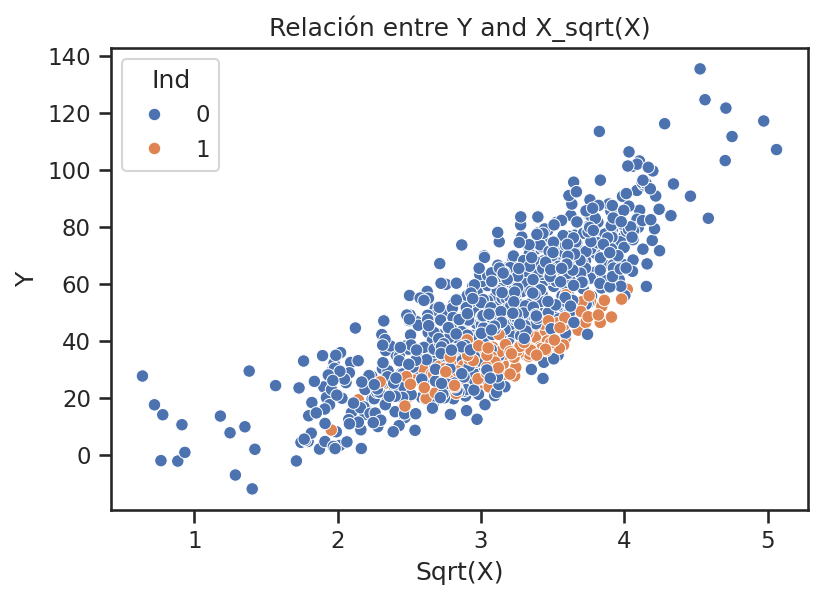

"\nfrom matplotlib import pyplot as plt\n# Analyze the relationship between Y and X\nplt.figure(figsize=(10, 8))\n# sns.scatterplot(x='X', y='Y', hue='Ind', data=df)\nsns.lmplot(x='X_sqrt', y='Y', hue='Ind', data=df, line_kws={'color': 'red'})\nplt.xlabel('X_sqrt')\nplt.ylabel('Y')\nplt.title('Relación entre Y and X_sqrt')\nplt.show()\n"

In [27]:
# @title Se Aplica una transformación de raíz cuadrada a X
# Transformación de la variable X
df['X_sqrt'] = np.sqrt(df['X'])

# Gráfico de dispersión Y vs X_sqrt
#plt.figure(figsize=(8, 6))
sns.scatterplot(x='X_sqrt', y='Y', hue='Ind', data=df)
plt.xlabel('Sqrt(X)')
plt.ylabel('Y')
plt.title('Relación entre Y and X_sqrt(X)')
plt.show()

'''
from matplotlib import pyplot as plt
# Analyze the relationship between Y and X
plt.figure(figsize=(10, 8))
# sns.scatterplot(x='X', y='Y', hue='Ind', data=df)
sns.lmplot(x='X_sqrt', y='Y', hue='Ind', data=df, line_kws={'color': 'red'})
plt.xlabel('X_sqrt')
plt.ylabel('Y')
plt.title('Relación entre Y and X_sqrt')
plt.show()
'''


In [28]:
df

,Y,X,Ind,X_log,X_sqrt
0,66.199147,12.653765,0,2.537955,3.557213
1,44.311301,8.204418,0,2.104673,2.864336
2,48.390783,8.768596,0,2.171177,2.961181
3,58.087413,16.169568,1,2.783131,4.021140
4,60.708671,9.980310,0,2.300614,3.159163
...,...,...,...,...,...
995,54.191565,6.769546,0,1.912434,2.601835
996,37.481140,9.297337,1,2.229728,3.049153
997,26.864547,9.391452,0,2.239800,3.064548
998,100.950444,17.370262,0,2.854760,4.167765


In [29]:
# Para determinar cuál de las dos transformaciones (logarítmica o raíz cuadrada) de X ayuda más al modelo de regresión lineal con interacción entre X_log e Ind,
# podemos comparar el ajuste de los modelos resultantes.

# 1. Ajustar el modelo con X_log:
# model_interaction_log = sm.ols('Y ~ X_log + C(Ind) + X_log:C(Ind)', data=df).fit()
# print(model_interaction_log.summary())

# 2. Ajustar el modelo con X_sqrt:
# model_interaction_sqrt = sm.ols('Y ~ X_sqrt + C(Ind) + X_sqrt:C(Ind)', data=df).fit()
# print(model_interaction_sqrt.summary())

# Comparar las métricas de ajuste, como R-cuadrado ajustado, AIC y BIC.
# El modelo con mayor R-cuadrado ajustado y menor AIC y BIC generalmente indica un mejor ajuste.
# También podemos analizar los p-valores de los coeficientes para determinar la significancia de la interacción y la transformación en el modelo.

# Además, podemos evaluar visualmente la dispersión de los residuos para ambos modelos.
# Una dispersión aleatoria de los residuos alrededor de la línea de regresión sugiere un buen ajuste del modelo.
# Comparar estos aspectos nos permitirá determinar si la transformación logarítmica o la raíz cuadrada de X mejora más el modelo y provee una mejor representación de la relación entre Y e Ind interactuando con X.


# En resumen, para determinar cuál transformación es más adecuada, se deben considerar los siguientes aspectos:
# - R-cuadrado ajustado: El modelo con un mayor R-cuadrado ajustado indica que explica mejor la variabilidad de la variable dependiente.
# - AIC y BIC: Un modelo con un menor AIC y BIC sugiere una mejor calidad de ajuste.
# - P-valores: Los p-valores de los coeficientes indican si la variable predictor es significativa para el modelo.
# - Gráfico de dispersión de residuos: Una dispersión aleatoria de los residuos indica que el modelo se ajusta bien a los datos.

# Se puede concluir que la transformación que resulte en un mejor ajuste según los criterios anteriores es la que ayuda más al modelo de regresión lineal con interacción entre X_log e Ind.


In [30]:
import statsmodels.formula.api as sm
# Modelo de regresión lineal con interacción entre X_log e Ind
# Import the correct module for using ols
model_interaction_log = sm.ols('Y ~ X_log + C(Ind) + X_log:C(Ind)', data=df).fit()
print(model_interaction_log.summary())



                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     589.2
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          1.78e-219
Time:                        21:55:10   Log-Likelihood:                -3938.5
No. Observations:                 992   AIC:                             7885.
Df Residuals:                     988   BIC:                             7905.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -28.3594      2.06

In [31]:
import statsmodels.formula.api as sm
model_interaction_sqrt = sm.ols('Y ~ X_sqrt + C(Ind) + X_sqrt:C(Ind)', data=df).fit()
print(model_interaction_sqrt.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     896.2
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          2.54e-281
Time:                        21:55:10   Log-Likelihood:                -3795.5
No. Observations:                 992   AIC:                             7599.
Df Residuals:                     988   BIC:                             7619.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -40.4191      1

In [32]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Debido a que la variable con mayor cantidad de NaN´s corresponde al 5% del conjunto de datos, se omitiran dichos datos
df = df.dropna();df

# Con 'Ind' como variable categórica y 'Y' es la variable target
X = df.drop(['Y','X','X_sqrt'], axis=1)
y = df['Y']

# Dividir el conjunto de datos en conjuntos de entrenamiento y de prueba
train_size = int(len(df) * 0.8)  # Calcular el índice para seleccionar el 80% de los datos para entrenamiento.
X_train = df[['X']][:train_size]
Y_train = df[['Y']][:train_size]
x_test = df[['X']][train_size:]
y_test = df[['Y']][train_size:]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)

print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
# Dividir los datos en entrenamiento y prueba
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train shape: (793, 1)
Y_train shape: (793, 1)
x_test shape: (199, 1)
y_test shape: (199, 1)


In [33]:
# @title Puntuación del modelo X_log
print(f"======================================================================")
print(f"====== X_log Evaluación el modelo sin interaciones con [Ind] =========")
print(f"======================================================================")

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
# Crear un transformador para codificar la variable categórica
categorical_features = ['Ind']
transformer = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough'
)

# Crear un pipeline que incluya el transformador y el modelo de regresión lineal
pipeline = Pipeline([
    ('transformer', transformer),
    ('regression', LinearRegression())
])

# Entrenar el modelo
pipeline.fit(X_train, Y_train)

# Realizar predicciones
y_pred = pipeline.predict(x_test)

# Puntuación del modelo
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# R2 Score
r2score = r2_score(y_test, y_pred)
print(f"R2 score: {r2score}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE score: {mae}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE score: {rmse}")
mse = mean_squared_error(y_test, y_pred)
# Mean Squared Error (MSE)
print(f"MSE score: {mse}")

print(f"======================================================================")
print(f"====== X_log Evaluación el modelo con interaciones con [Ind] =========")
print(f"======================================================================")


# Para incluir interacciones, puedes usar PolynomialFeatures de scikit-learn
from sklearn.preprocessing import PolynomialFeatures

# Crear un pipeline que incluya el transformador, las interacciones y el modelo de regresión lineal
pipeline_with_interactions = Pipeline([
    ('transformer', transformer),
    ('interactions', PolynomialFeatures(interaction_only=True)),
    ('regression', LinearRegression())
])

# Entrenar el modelo con interacciones
pipeline_with_interactions.fit(X_train, Y_train)

# Realizar predicciones con interacciones
y_pred_with_interactions = pipeline_with_interactions.predict(x_test)

# Evaluar el modelo con interacciones
mse = mean_squared_error(y_test, y_pred_with_interactions)
print(f'Mean Squared Error con interacciones: {mse}')

# R2 Score
r2score = r2_score(y_test, y_pred_with_interactions)
print(f"R2 score con interacciones: {r2score}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_with_interactions)
print(f"MAE Absolute error con interacciones: {mae}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_with_interactions))
print(f"RMSE Mean Squared Error: {rmse}")

mse = mean_squared_error(y_test, y_pred_with_interactions)
# Mean Squared Error (MSE)
print(f"MSE Mean Squared Error: {mse}")



====== X_log Evaluación el modelo sin interaciones con [Ind] =========
Mean Squared Error: 163.8135552948609
R2 score: 0.6506243898404421
MAE score: 9.848466666602912
RMSE score: 12.798966962019275
MSE score: 163.8135552948609
====== X_log Evaluación el modelo con interaciones con [Ind] =========
Mean Squared Error con interacciones: 164.603651816962
R2 score con interacciones: 0.648939300630351
MAE Absolute error con interacciones: 9.968105121233254
RMSE Mean Squared Error: 12.829795470581828
MSE Mean Squared Error: 164.603651816962


In [34]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Debido a que la variable con mayor cantidad de NaN´s corresponde al 5% del conjunto de datos, se omitiran dichos datos
df = df.dropna();df

# Con 'Ind' como variable categórica y 'Y' es la variable target
X = df.drop(['Y','X','X_log'], axis=1)
y = df['Y']

# Dividir el conjunto de datos en conjuntos de entrenamiento y de prueba
train_size = int(len(df) * 0.8)  # Calcular el índice para seleccionar el 80% de los datos para entrenamiento.
X_train = df[['X']][:train_size]
Y_train = df[['Y']][:train_size]
x_test = df[['X']][train_size:]
y_test = df[['Y']][train_size:]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)

print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
# Dividir los datos en entrenamiento y prueba
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train shape: (793, 1)
Y_train shape: (793, 1)
x_test shape: (199, 1)
y_test shape: (199, 1)


In [35]:
# @title Puntuación del modelo X_sqrt
print(f"======================================================================")
print(f"====== X_sqrt Evaluación el modelo sin interaciones con [Ind] =========")
print(f"======================================================================")

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
# Crear un transformador para codificar la variable categórica
categorical_features = ['Ind']
transformer = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough'
)

# Crear un pipeline que incluya el transformador y el modelo de regresión lineal
pipeline = Pipeline([
    ('transformer', transformer),
    ('regression', LinearRegression())
])

# Entrenar el modelo
pipeline.fit(X_train, Y_train)

# Realizar predicciones
y_pred = pipeline.predict(x_test)

# Puntuación del modelo
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# R2 Score
r2score = r2_score(y_test, y_pred)
print(f"R2 score: {r2score}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE score: {mae}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE score: {rmse}")
mse = mean_squared_error(y_test, y_pred)
# Mean Squared Error (MSE)
print(f"MSE score: {mse}")

print(f"======================================================================")
print(f"====== X_sqrt Evaluación el modelo con interaciones con [Ind] =========")
print(f"======================================================================")


# Para incluir interacciones, puedes usar PolynomialFeatures de scikit-learn
from sklearn.preprocessing import PolynomialFeatures

# Crear un pipeline que incluya el transformador, las interacciones y el modelo de regresión lineal
pipeline_with_interactions = Pipeline([
    ('transformer', transformer),
    ('interactions', PolynomialFeatures(interaction_only=True)),
    ('regression', LinearRegression())
])

# Entrenar el modelo con interacciones
pipeline_with_interactions.fit(X_train, Y_train)

# Realizar predicciones con interacciones
y_pred_with_interactions = pipeline_with_interactions.predict(x_test)

# Evaluar el modelo con interacciones
mse = mean_squared_error(y_test, y_pred_with_interactions)
print(f'Mean Squared Error con interacciones: {mse}')

# R2 Score
r2score = r2_score(y_test, y_pred_with_interactions)
print(f"R2 score con interacciones: {r2score}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_with_interactions)
print(f"MAE Absolute error con interacciones: {mae}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_with_interactions))
print(f"RMSE Mean Squared Error: {rmse}")

mse = mean_squared_error(y_test, y_pred_with_interactions)
# Mean Squared Error (MSE)
print(f"MSE Mean Squared Error: {mse}")



====== X_sqrt Evaluación el modelo sin interaciones con [Ind] =========
Mean Squared Error: 132.202759408779
R2 score: 0.7180427489649363
MAE score: 8.892130839001672
RMSE score: 11.497945877798303
MSE score: 132.202759408779
====== X_sqrt Evaluación el modelo con interaciones con [Ind] =========
Mean Squared Error con interacciones: 129.85411465410033
R2 score con interacciones: 0.7230518533259087
MAE Absolute error con interacciones: 8.886580862141747
RMSE Mean Squared Error: 11.395354959548225
MSE Mean Squared Error: 129.85411465410033


# Conclusiones

1. Pendiente